In [3]:
import wotan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wotan import flatten
from wotan import t14
import lightkurve as lk

In [4]:
# Download AU Mic's light curve
raw_lc = lk.search_lightcurvefile('TIC 441420236').download()

ipykernel_launcher:1: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
C:\Users\60002\AppData\Local\Programs\Python\Python37\lib\site-packages\lightkurve\search.py:352: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


In [19]:
def make_plot(detrendMethod, window_size,plot_color): 
    raw_times = raw_lc.time.value
    raw_fluxes = raw_lc.flux.value
    flatten_lc, trend_lc = flatten(
    raw_times,          
    raw_fluxes,                 
    method=detrendMethod,
    window_length=window_size,   
    break_tolerance=0.5,  
    return_trend=True
    )

    plt.scatter(raw_times, raw_fluxes, s=1, color='black')
    plt.plot(raw_times, trend_lc, linewidth=2, color=plot_color)

    


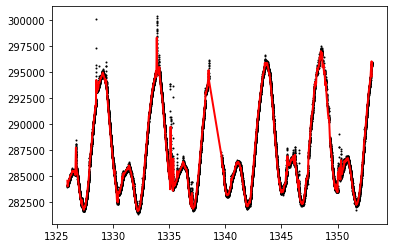

In [20]:
make_plot('ridge',.01,"red")

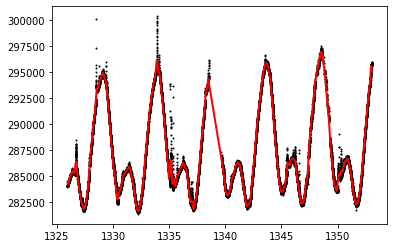

In [21]:
make_plot('ridge',.05,'red')

Converged.
Converged.


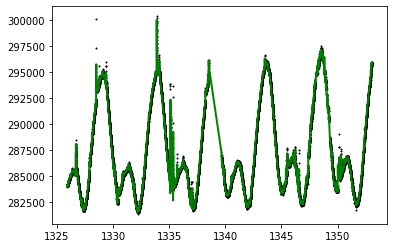

In [22]:
make_plot('cosine',.01,'green')

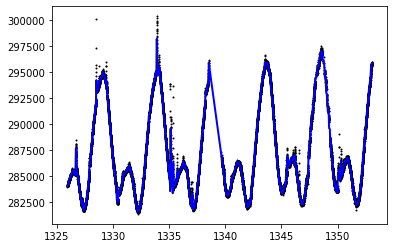

In [23]:
make_plot('savgol',51,'blue')